# 概率论
## 基本概率论
- 抽样(sampling)：从概率分布中抽取样本
- 分布(distribution)：对事件的概率分配
- 多项分布(multinomial distribution)：将概率分配给一些离散选择的分布

In [2]:
# 导入包
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt
import numpy as np

# 为了抽取一个样本，即掷骰子，我们只需传入一个概率向量fair_probs。输出的是另一个相同长度的向量：它在索引i处的值是采样结果中i出现的次数
fair_probs=torch.ones([6])/6
multinomial.Multinomial(1,fair_probs).sample()


tensor([1., 0., 0., 0., 0., 0.])

In [3]:
# 通过深度学习框架同时抽取多个样本
multinomial.Multinomial(10,fair_probs).sample()

tensor([2., 2., 1., 3., 0., 2.])

In [4]:
#模拟1000次投掷
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1680, 0.1770, 0.1670, 0.1680, 0.1540, 0.1660])

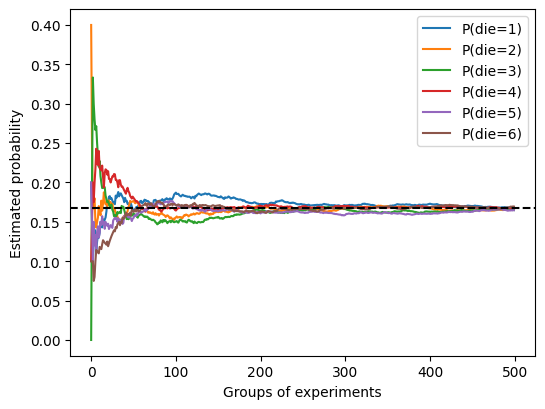

In [5]:
# 观察概率如何随时间推移收敛到真实概率，500组实验，每组抽取10个样本
counts=multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)
plt.figure(figsize=(6, 4.5)) 
for i in range(6):
    plt.plot(estimates[:,i].tolist(), label=("P(die="+str(i+1)+")"))
plt.axhline(y=0.167,color='black',linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();
plt.show()


### 概率论公理
- 样本空间(sample space)：所有可能事件，如S={1,2,3,4,5,6}，也叫outcome space，每个元素都是outcome
- 事件(event)：样本空间中的子集，如A={1,2,3}，B={4,5,6}，C={1,2,3,4,5,6}，如果随机实验结果在A中，则称A event发生
- 概率(probability)：事件发生概率，如P(A)=1/6，P(B)=1/6，P(C)=1，可以被认为是将集合映射到真实值的函数
  - sample space $\mathbf{S}$, event $\mathbf{A}, \mathbf{B}$, probability function $\mathbf{P}$, probability $\mathbf{P(A)}$
    - $$\mathbf{P(A)} \geq 0$$
    - $$\mathbf{P(S)} = 1$$
    - if mutually exclusive events(互斥), then
      - $$P(A \cup B) = P(A) + P(B)$$

### 随机变量(random variable)
- 随机变量是随机试验中在一组可能性中取一个值的数量，分离散(discrete, 如骰子)和连续(continuous, 如身高)两类，离散通过概率表示取值情况，连续需用密度表示区间概率

### 处理多个随机变量
- 很多时候我们会考虑多个随即变量，如需要对疾病和症状之间的关系进行建模，如“流感”、“咳嗽”，我们需要估计这些概率以及概率之间的关系

#### 联合概率(joint probability)
- 联合概率是两个随机变量同时出现的概率，$\mathbf{P}(A=a,B=b) \leq \mathbf{P}(A=a)$

#### 条件概率(conditional probability)
- From joint probability, we konw $ 0 \leq \mathbf{P}(A|B) \leq 1$, and $\mathbf{P}(A|B)=\frac{\mathbf{P}(A,B)}{\mathbf{P}(A)}$

#### 贝叶斯定理(Bayes' theorem)
- From conditional probability, we konw $\mathbf{P}(A,B)=\mathbf{P}(A|B)\mathbf{P}(B)$, and also $\mathbf{P}(A,B)=\mathbf{P}(B|A)\mathbf{P}(A)$.
  - if $\mathbf{P}(B) > 0$, we can get $\mathbf{P}(A|B)=\frac{\mathbf{P}(A|B) \mathbf{P}(A)}{\mathbf{P}(B)}$

#### 边际化(marginalization)
- 对事件概率求和，也叫求和法则(sum rule)，即B的概率相当于计算A的所有可能选择，并将所有joint probability聚合在一起  
$$ \mathbf{P}(B)=\sum_{A}\mathbf{P}(A,B) $$
-  marginalization结果的概率或分布叫做边际概率(marginal probability)或边际分布(marginal distribution)

#### 独立性
- A与B是独立的，记作$A \perp B$
- 根据Bayes' theorem，A与B是独立的，即$\mathbf{P}(A|B)=\mathbf{P}(A)$
- $\mathbf{P}(A|B)=\frac{\mathbf{P}(A,B)}{\mathbf{P}(B)}=\mathbf{P}(A) \Rightarrow \mathbf{P}(A,B)=\mathbf{P}(A)\mathbf{P}(B)$

#### 应用
- D1表示检测结果，D1==阳性?1:0
- H表示HIV状态，H==阳性?1:0
<center>

|条件概率|H=1|H=0|
|:---:|:---:|:---:|
|$P(D_1=1 \mid H)$|1|0.01|
|$P(D_1=0 \mid H)$|0|0.99|

</center>

- 假设全体人口中HIV感染者的概率为0.0015，即$P(H=1)=0.0015$，则患者检测结果为阳性时，其真实患病率$P(H=1|D_1=1)$为
  $$ 
  \begin{aligned}
  P(D_1=1)&=P(D_1=1,H=0)+P(D_1=1,H=1)\\
  &=P(D_1=1 \mid H=0)P(H=0)+P(D_1=1 \mid H=1)P(H=1)\\
  &=0.01*0.9985+1*0.0015=0.011485 \\
  
  \Rightarrow
  P(H=1|D_1=1)&=\frac{P(D_1=1|H=1)P(H=1)}{P(D_1=1)}\\
  &=\frac{0.0015}{0.011485}=0.1306
  \end{aligned}
  $$
- 也就是说，尽管该测试检测结果很准确，但是当结果为阳性的时候，其真实患病率却很低
- 引入第二个测试
  <center>

  |条件概率|H=1|H=0|
  |:---:|:---:|:---:|
  |$P(D_2=1 \mid H)$|0.98|0.03|
  |$P(D_2=0 \mid H)$|0.02|0.97|
  
  </center>

- 但不幸的是，第二次测试也是阳性。那么患者真实患病率$P(H=1|D_1=1,D_2=1)$为
  $$
  \begin{aligned}
  P(D_1=1,D_2=1 \mid H=0)\\
  &=P(D_1=1 \mid H=0)P(D_2=1 \mid H=0)\\
  &=0.01*0.03\\
  &=0.0003\\
  P(D_1=1,D_2=1 \mid H=1)\\
  &=P(D_1=1 \mid H=1)P(D_2=1 \mid H=1)\\
  &=1*0.98\\
  &=0.98\\
  \Rightarrow
  P(D_1=1,D_2=1)\\
  &=P(D_1=1,D_2=1,H=0)+P(D_1=1,D_2=1,H=1)\\
  &=P(D_1=1,D_2=1 \mid H=0)P(H=0)+P(D_1=1,D_2=1 \mid H=1)P(H=1)\\
  &=0.0003*0.9985+0.98*0.0015=0.00176955\\
  \Rightarrow
  P(H=1|D_1=1,D_2=1)\\
  &=\frac{P(D_1=1,D_2=1\mid H=1)P(H=1)}{P(D_1=1,D_2=1)}\\
  &=\frac{0.98*0.0015}{0.00176955}=0.8307
  \end{aligned}
  $$
  

## 期望和方差
### 期望(Expectation)
- 期望是随机变量 X 的 “加权平均值”，权重为每个取值的概率，即“这个分布的中心在哪里？”
- 随机变量的期望
  $$ E[X] = \sum_x x P(X = x) $$
- 函数$f(x)$的期望
  $$ E_{x \sim P}[f(x)] = \sum_x f(x) P(x) $$

### 方差(Variance)
- 方差衡量变量的取值与它的期望之间的 “平均偏离程度”，反映数据的离散性。
- 随机变量的方差
  $$
  \text{Var}[X] = E\left[(X - E[X])^2\right] = E[X^2] - E[X]^2
  $$
- 函数$f(x)$的方差
  $$
  \text{Var}[f(x)] = E\left[(f(x) - E[f(x)])^2\right] 
  $$
- 方差的平方根是标准差(standard deviation)
  
### 在机器学习中的应用
- 模型评估：
  - 期望可用于定义损失函数（如线性回归的 “均方误差” 是预测值与真实值差的期望），衡量模型预测的 “平均误差”；
  - 方差可用于分析模型泛化能力（如决策树过拟合时，方差大，对不同数据的预测波动大）。
- 特征选择：
  - 方差小的特征（如 “样本 ID” 这类几乎无波动的特征）对模型区分度低，可优先剔除；方差大的特征（如 “用户消费金额”）往往包含更多信息。

## 练习


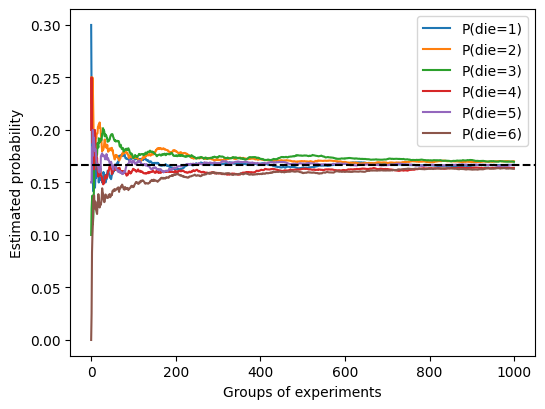

In [10]:
# 进行1000次实验，每组抽取20个样本
counts=multinomial.Multinomial(20,fair_probs).sample((1000,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)
plt.figure(figsize=(6, 4.5)) 
for i in range(6):
    plt.plot(estimates[:,i].tolist(), label=("P(die="+str(i+1)+")"))
plt.axhline(y=0.167,color='black',linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();
plt.show()

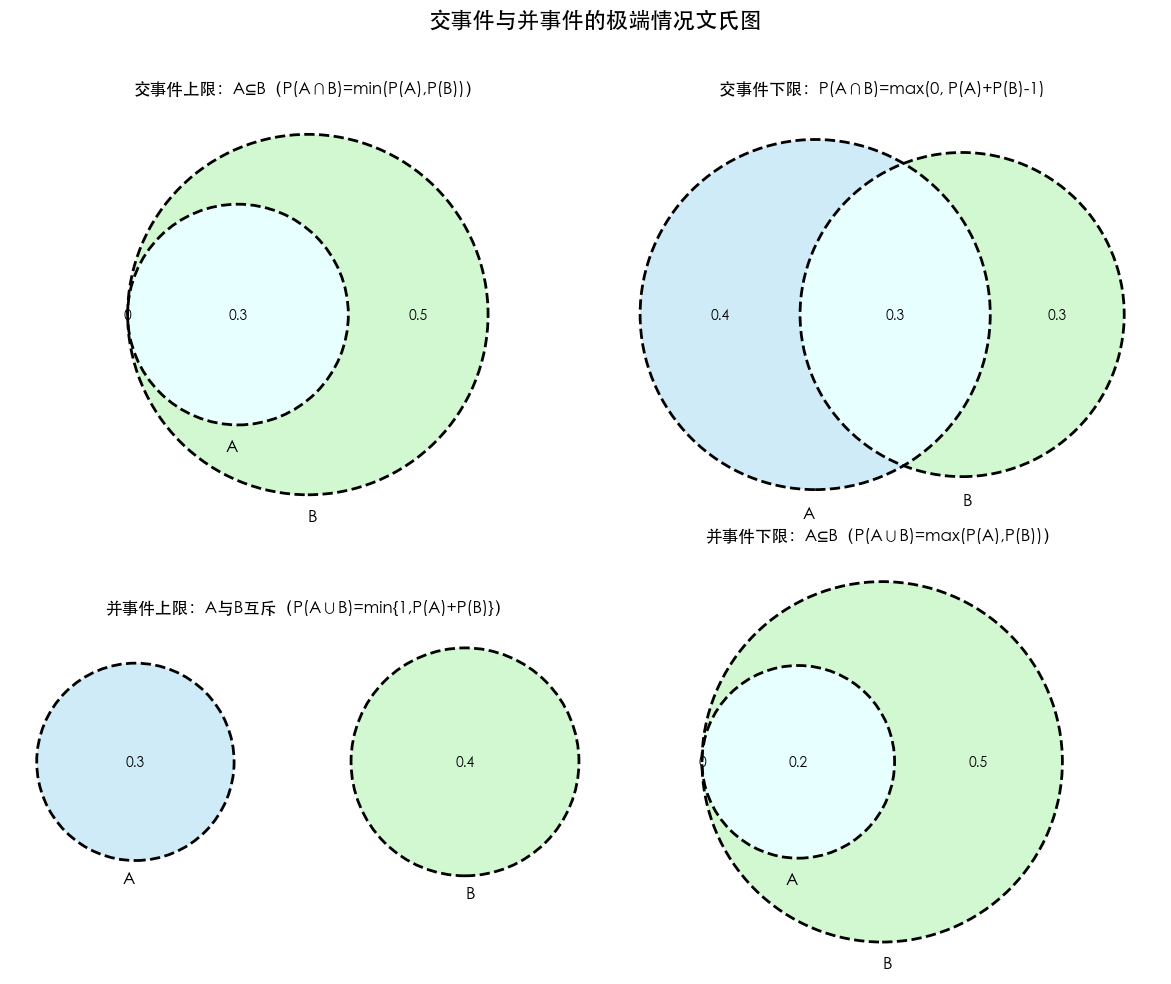

In [ ]:

from matplotlib_venn import venn2, venn2_circles

# 关键：替换为Mac原生中文字体，优先选苹方，备选华文黑体等
plt.rcParams["font.family"] = ["STHeiti", "Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 创建一个2x2的子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("交事件与并事件的极端情况文氏图", fontsize=16)

# --------------------------
# 1. 交事件上限：A完全包含于B（P(A∩B)=P(A)，此时P(A)≤P(B)）
# --------------------------
ax1 = axes[0, 0]
venn2(subsets=(0, 0.5, 0.3),  # 子集格式：(只A, 只B, A∩B)，总和为P(A∪B)
      set_labels=('A', 'B'),
      ax=ax1,
      set_colors=('skyblue', 'lightgreen'))
venn2_circles(subsets=(0, 0.5, 0.3), ax=ax1, linestyle='dashed')
ax1.set_title("交事件上限：A⊆B（P(A∩B)=min(P(A),P(B))）")

# --------------------------
# 2. 交事件下限：A和B重叠最小（P(A∩B)=max(0, P(A)+P(B)-1)）
# 示例：P(A)=0.6, P(B)=0.5，则P(A∩B)=0.1（因0.6+0.5-1=0.1）
# --------------------------
ax2 = axes[0, 1]
venn2(subsets=(0.4, 0.3, 0.3),  # 只A=0.6-0.1=0.5；只B=0.5-0.1=0.4；交=0.1
      set_labels=('A', 'B'),
      ax=ax2,
      set_colors=('skyblue', 'lightgreen'))
venn2_circles(subsets=(0.4, 0.3, 0.3), ax=ax2, linestyle='dashed')
ax2.set_title("交事件下限：P(A∩B)=max(0, P(A)+P(B)-1)")

# --------------------------
# 3. 并事件上限：A和B互斥（P(A∪B)=P(A)+P(B)，此时P(A)+P(B)≤1）
# 示例：P(A)=0.3, P(B)=0.4，无重叠，P(A∪B)=0.7
# --------------------------
ax3 = axes[1, 0]
venn2(subsets=(0.3, 0.4, 0),  # 交事件为0（互斥）
      set_labels=('A', 'B'),
      ax=ax3,
      set_colors=('skyblue', 'lightgreen'))
venn2_circles(subsets=(0.3, 0.4, 0), ax=ax3, linestyle='dashed')
ax3.set_title("并事件上限：A与B互斥（P(A∪B)=min{1,P(A)+P(B)}）")

# --------------------------
# 4. 并事件下限：A完全包含于B（P(A∪B)=P(B)，此时P(B)≥P(A)）
# --------------------------
ax4 = axes[1, 1]
venn2(subsets=(0, 0.5, 0.2),  # 只A=0.2，只B=0.5，交=0.2（P(A)=0.4，P(B)=0.7）
      set_labels=('A', 'B'),
      ax=ax4,
      set_colors=('skyblue', 'lightgreen'))
venn2_circles(subsets=(0, 0.5, 0.2), ax=ax4, linestyle='dashed')
ax4.set_title("并事件下限：A⊆B（P(A∪B)=max(P(A),P(B))）")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整布局，避免标题重叠
plt.show()

### 一系列随机变量A,B,C其中B只依赖于A，而C只依赖于B，能简化联合概率P(A,B,C)吗？
简化推导过程首先，根据联合概率的基本分解规则（链式法则），原始联合概率可拆分为：
$$P(A,B,C) = P(A) \cdot P(B \mid A) \cdot P(C \mid A,B)$$

结合马尔可夫链的无后效性 $P(C \mid A,B) = P(C \mid B)$，代入上式：
$$P(A,B,C) = P(A) \cdot P(B \mid A) \cdot P(C \mid B)$$

## 第一个测试更准，为什么不运行第一个测试两次
- 同理得到$P(H=1\mid D_1=1,D_1=1)=0.9376$确实高于两个不同测试，但实际中同一测试的误差可能存在相关性（比如样本污染、检测原理的固有缺陷），两次测试的独立性无法保证，真实后验概率会远低于 0.9375。